In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
frequency = 50 
duration = 0.3 

def create_sine_signal(tsample, duration, frequency):
    t = np.arange(0, duration, tsample) 
    x = np.sin(2 * np.pi * t * frequency) 
    return t, x

Text(0.5, 1.0, 'Sample Frequency: 1000 Hz')

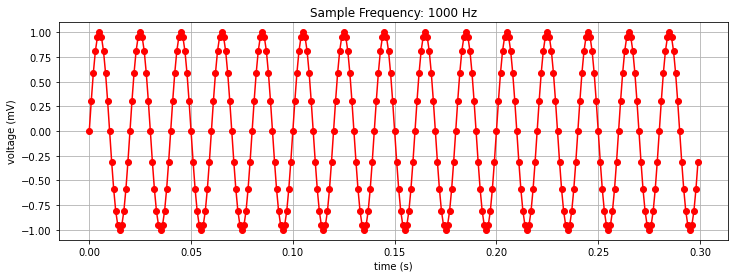

In [3]:
fsample = 1000
tsample = 1 / fsample
t, x = create_sine_signal(tsample, duration, frequency)

fig, ax = plt.subplots(1, 1, figsize = [12, 4])
ax.plot(t, x, color = 'red', marker = 'o', linestyle = '-')
ax.set(ylabel = 'voltage (mV)', xlabel = 'time (s)')
ax.grid()
ax.set_title(f'Sample Frequency: {fsample} Hz')

Text(0.5, 1.0, 'Sample Frequency: 50 Hz')

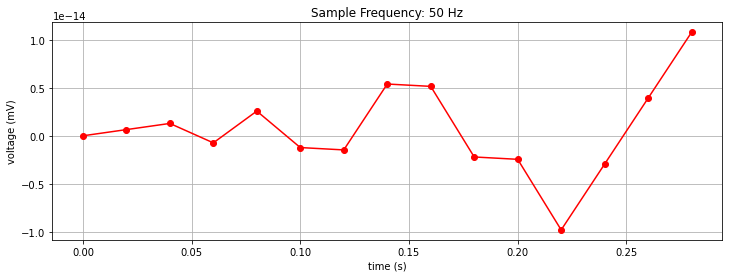

In [4]:
fsample = 50
tsample = 1 / fsample
t, x = create_sine_signal(tsample, duration, frequency)

fig, ax = plt.subplots(1, 1, figsize = [12, 4])
ax.plot(t, x, color = 'red', marker = 'o', linestyle = '-')
ax.set(ylabel = 'voltage (mV)', xlabel = 'time (s)')
ax.grid()
ax.set_title(f'Sample Frequency: {fsample} Hz')

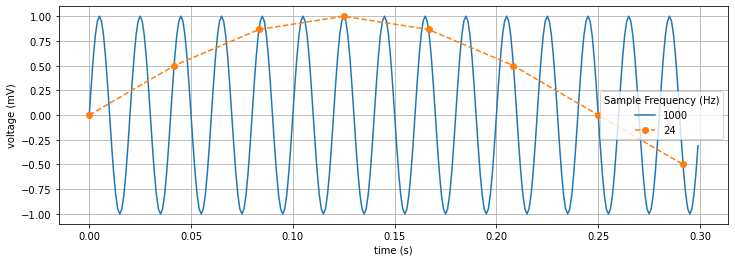

In [5]:
fig, ax = plt.subplots(1, 1, figsize = [12, 4])
ax.set(ylabel = 'voltage (mV)', xlabel = 'time (s)')
ax.grid()

fsample = 1000
tsample = 1 / fsample
t, x = create_sine_signal(tsample, duration, frequency)
ax.plot(t, x, linestyle = '-', label = fsample)

fsample = 24
tsample = 1 / fsample
t, x = create_sine_signal(tsample, duration, frequency)
ax.plot(t, x, marker = 'o', linestyle = '--', label = fsample)

ax.legend(title = 'Sample Frequency (Hz)')

In [6]:
# First, show raw output of 

In [7]:
def simple_fft(tsample, x):
    N = len(x) 
    y = np.fft.fft(x) 
    y = 2 * np.abs(y) / N 
    # factor of 2 because signal is split equally between negative and positive frequency
    f = np.fft.fftfreq(N, d = tsample) 
    f, y = f[:N // 2], y[:N // 2]
    return f, y

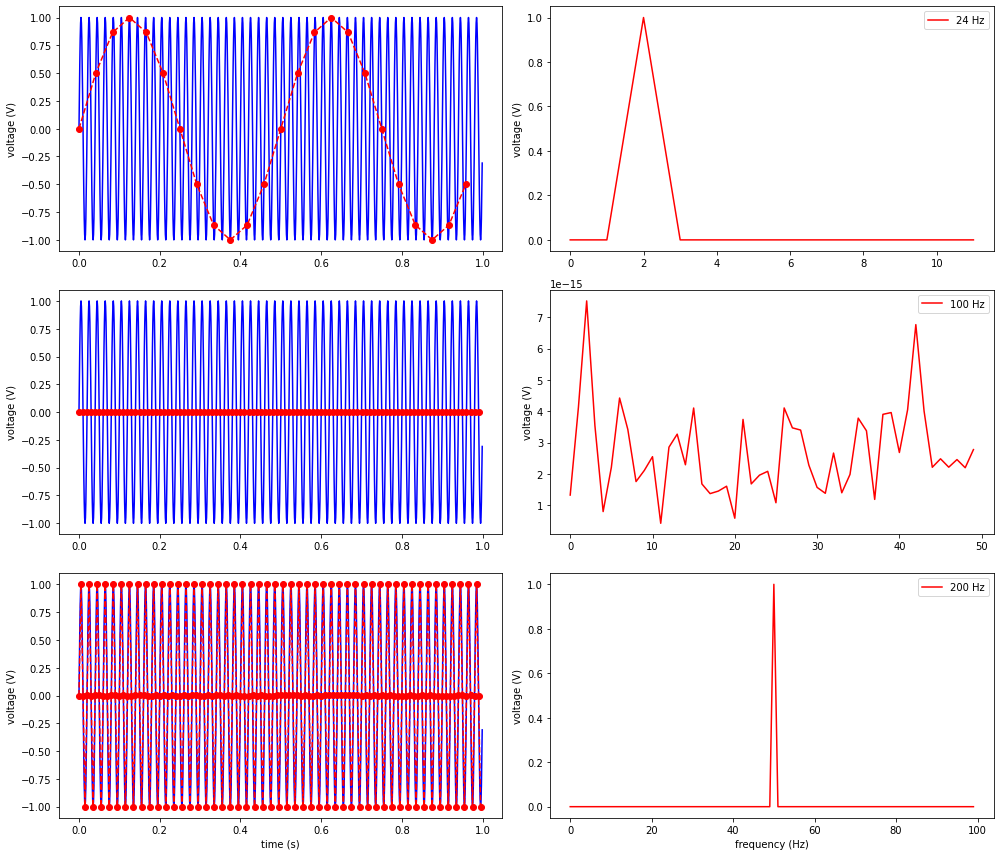

In [8]:
duration = 1
tsample = 1 / 1000
t, x = create_sine_signal(tsample, duration, frequency)

nfreqs = 3
fig, axs = plt.subplots(nfreqs, 2, figsize = [14, 4 * nfreqs], layout = 'tight')
axs[2, 0].set(xlabel = 'time (s)')
axs[2, 1].set(xlabel = 'frequency (Hz)')
for ax in axs.flatten():
    ax.set_ylabel('voltage (V)')
for ax in axs[:, 0]:
    ax.plot(t, x, color = 'b')
    

for index, fsample in enumerate([24, 100, 200]):
    tsample = 1 / fsample
    t, x = create_sine_signal(tsample, duration, frequency)
    f, y = simple_fft(tsample, x)
    axs[index, 0].plot(t, x, 'o--r')
    axs[index, 1].plot(f, y, 'r', label = f'{fsample} Hz')
    axs[index, 1].legend()

# Averaging

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
def simple_fft(tsample, x):
    N = len(x) 
    y = np.fft.fft(x) 
    y = 2 * np.abs(y) / N 
    # factor of 2 because signal is split equally between negative and positive frequency
    f = np.fft.fftfreq(N, d = tsample) 
    f, y = f[:N // 2], y[:N // 2]
    return f, y

In [10]:
frequency = 50
fsample = 1000 
tsample = 1 / fsample
t = np.arange(0, 1, tsample) 

delta = 0
x = np.sin(2 * np.pi * t * frequency + delta) 
x += 10 * np.random.normal(0, 1, len(x)) # Centered on 0, amplitude 1, len N

f, y = simple_fft(tsample, x)

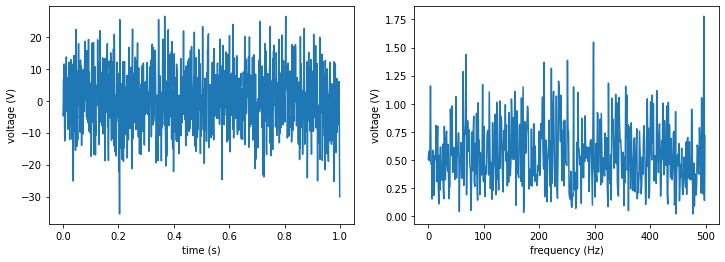

In [11]:
fig, axs = plt.subplots(1, 2, figsize = [12, 4])
axs[0].set(xlabel = 'time (s)', ylabel = 'voltage (V)')
axs[1].set(xlabel = 'frequency (Hz)', ylabel = 'voltage (V)')
axs[0].plot(t, x)
axs[1].plot(f, y)

In [12]:
frequency = 50
fsample = 1000 
tsample = 1 / fsample
t = np.arange(0, 1, tsample) 

xs = [] 
for i in range(20):
    delta = np.random.uniform(-np.pi / 2, np.pi / 2)
    x = np.sin(2 * np.pi * t * frequency + delta) 
    x += 10 * np.random.normal(0, 1, len(x)) # Centered on 0, amplitude 1, len N
    xs.append(x)



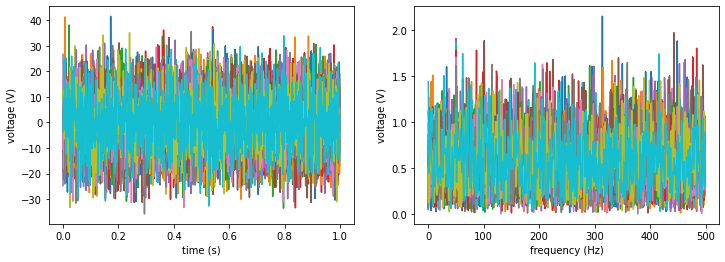

In [13]:
fig, axs = plt.subplots(1, 2, figsize = [12, 4])
axs[0].set(xlabel = 'time (s)', ylabel = 'voltage (V)')
axs[1].set(xlabel = 'frequency (Hz)', ylabel = 'voltage (V)')

for x in xs:
    axs[0].plot(t, x)
    f, y = simple_fft(tsample, x)
    axs[1].plot(f, y)

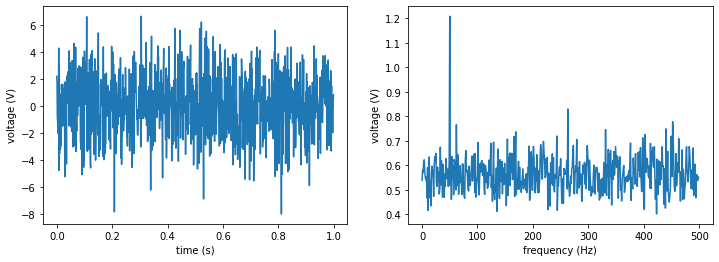

In [14]:
fig, axs = plt.subplots(1, 2, figsize = [12, 4])
axs[0].set(xlabel = 'time (s)', ylabel = 'voltage (V)')
axs[1].set(xlabel = 'frequency (Hz)', ylabel = 'voltage (V)')

x_avg = np.mean(xs, axis = 0)
axs[0].plot(t, x_avg)
ys = []
for x in xs:
    f, y = simple_fft(tsample, x)
    ys.append(y)

y_avg = np.mean(ys, axis = 0)
axs[1].plot(f, y_avg)

In [15]:
# Extract the magnitude at the desired frequency 
frequency = 50 
ix = np.argmin(np.abs(f - frequency))
y_avg[ix]

1.208629925711693

In [16]:
# Average more 
ys = [] 
for i in range(1000):
    delta = np.random.uniform(-np.pi / 2, np.pi / 2)
    x = np.sin(2 * np.pi * t * frequency + delta) 
    x += 10 * np.random.normal(0, 1, len(x)) # Centered on 0, amplitude 1, len N
    f, y = simple_fft(tsample, x)
    ys.append(y)
y_avg = np.mean(ys, axis = 0)

frequency = 50 
ix = np.argmin(np.abs(f - frequency))
y_avg[ix]

1.1044863425363953